In [1]:
import h5py
import numpy as np
from tqdm.notebook import tqdm
import os
import glob
import matplotlib.pyplot as plt
import time

from train_transformer import *

from utils import *
from models import *

import warnings
warnings.filterwarnings('ignore')

assert torch.cuda.is_available()
device = 'cuda'

In [2]:
train_f = sorted(glob.glob('train_/*.hdf'))
# train_f.remove('../../stock_price/train\\20190425_20190510.hdf')
test_f = sorted(glob.glob('test_/*.hdf'))
# test_f.remove('../stock_price/test\IC2003_20191018.hdf') # batch为256时，第71个batch大小为2， 不足以用于预测

In [3]:
train_f = [train_f[0], train_f[4], train_f[6],train_f[-1]]
# train_f = train_f[-6:]
train_f

['train_\\20190401_20190412.hdf',
 'train_\\20190523_20190604.hdf',
 'train_\\20190617_20190628.hdf',
 'train_\\20190723_20190731.hdf']

In [4]:
# Hyperparams
enc_in = 15
dec_in = 2
c_out = 1 
seq_len = 20
out_len = 1
d_model = 32
d_ff = 32
n_heads = 4
label_len = 10
e_layers = 2
d_layers = 2
scaler = False
opt_s = False

decay = 100
dropout = 0.1
batch_size = 256
val_batch = 512
lr = 0.0005

In [5]:
transformer = Train_transformer(enc_in, dec_in, c_out, seq_len, out_len, d_model, d_ff, n_heads, 
                                e_layers, d_layers, label_len,
                                dropout, batch_size, val_batch, lr,
                              device, train_f, test_f,scaler, decay, opt_s)

In [6]:
transformer._build_model(m='trans')

Transformer_(
  (encs): ModuleList(
    (0): EncoderLayer(
      (attn): AttentionLayer(
        (inner_attention): Attention()
        (query_projection): Linear(in_features=32, out_features=128, bias=True)
        (key_projection): Linear(in_features=32, out_features=128, bias=True)
        (value_projection): Linear(in_features=32, out_features=128, bias=True)
        (out_projection): Linear(in_features=128, out_features=32, bias=True)
      )
      (fc1): Linear(in_features=32, out_features=32, bias=True)
      (fc2): Linear(in_features=32, out_features=32, bias=True)
      (norm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (1): EncoderLayer(
      (attn): AttentionLayer(
        (inner_attention): Attention()
        (query_projection): Linear(in_features=32, out_features=128, bias=True)
        (key_projection): Linear(in_features=32, out_featur

In [7]:
# transformer._selct_criterion('huber', beta=0.2)
transformer._selct_criterion()

In [8]:
print("Total number of paramerters in networks is {}  ".format(sum(x.numel() for x in transformer.model.parameters())))

Total number of paramerters in networks is 135233  


In [9]:
transformer._selct_optim('sgdm')
transformer._selct_scheduler(opt='plateau',patience=5, factor=0.1, step=4000)
# Informer._selct_scheduler(opt='cyclic',base_lr=0.001, max_lr=0.005)

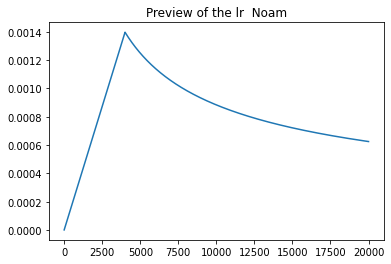

In [10]:
transformer.preview_noam()

In [10]:
transformer.val_every=True
transformer.test_every = False

In [ ]:
transformer.train(epochs=20, train_all=True, f='../../stock_price/train\\20190723_20190731.hdf',
            val_size=0.2, test_round=1, save='train',patience=40)

  0%|          | 0/20 [00:00<?, ?it/s]

After training train_\20190401_20190412  Train_loss:0.977748 R2:0.019106 | Val_Loss:0.929760 |R2:0.066491 |Rate:0.571 |lr:0.000500
After training train_\20190523_20190604  Train_loss:0.828661 R2:0.167875 | Val_Loss:0.712388 |R2:0.282608 |Rate:0.680 |lr:0.000500
After training train_\20190617_20190628  Train_loss:0.719481 R2:0.278234 | Val_Loss:0.660230 |R2:0.331666 |Rate:0.687 |lr:0.000500
After training train_\20190723_20190731  Train_loss:0.673921 R2:0.319638 | Val_Loss:0.651056 |R2:0.349633 |Rate:0.686 |lr:0.000500
Save here
Epoch:  1 |Train_Loss:0.799952 |R2:0.196213|Val_Loss:0.738359 |R2:0.257600 |Rate:0.656 |lr:0.000500
Test_Loss:0.709156 |R2:0.286123 |Rate:0.676 
Validation R2 increased (-inf --> 0.257600).  Saving model ...
After training train_\20190401_20190412  Train_loss:0.603885 R2:0.391560 | Val_Loss:0.580538 |R2:0.417144 |Rate:0.713 |lr:0.000500
After training train_\20190523_20190604  Train_loss:0.624341 R2:0.371350 | Val_Loss:0.604990 |R2:0.390741 |Rate:0.705 |lr:0.000